In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
pwd

'c:\\Users\\swang\\OneDrive\\Рабочий стол\\Cockding\\test'

In [4]:
df = pd.read_csv('../titanic/train.csv')

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

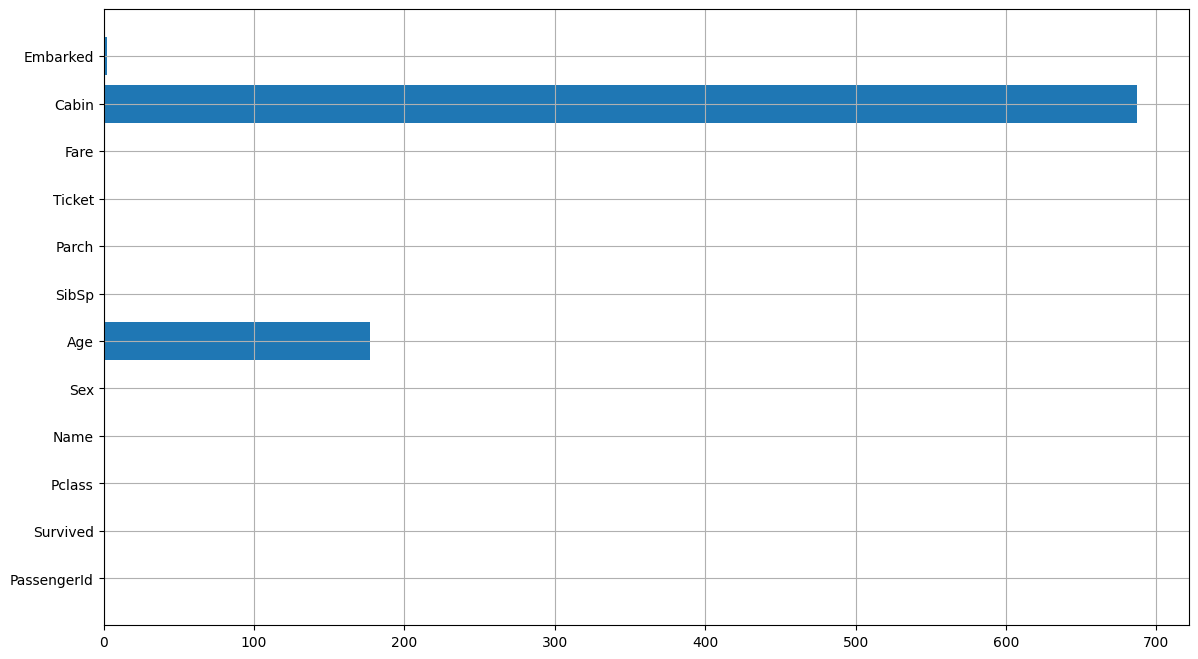

In [7]:
plt.figure(figsize=[14, 8])
plt.barh(df.isna().sum().index, df.isna().sum())
plt.grid()

<Axes: >

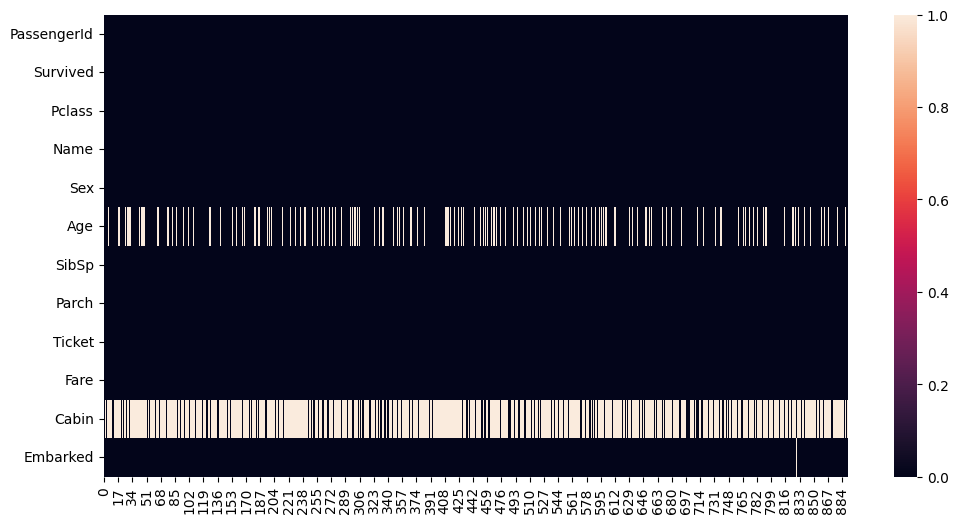

In [8]:
plt.figure(figsize=[12, 6])
sns.heatmap(df.isna().T)

In [9]:
df.shape[0] # Count of all data
df['Cabin'].isna().sum() # Empty counts

np.round((df['Cabin'].isna().sum() / df.shape[0] * 100), 2)

np.float64(77.1)

In [10]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Sex'])

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\swang\AppData\Local\Temp\ipykernel_23084\3371465347.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [11]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [12]:
df['Title'].value_counts().to_dict()

{'Mr': 517,
 'Miss': 182,
 'Mrs': 125,
 'Master': 40,
 'Dr': 7,
 'Rev': 6,
 'Col': 2,
 'Mlle': 2,
 'Major': 2,
 'Ms': 1,
 'Mme': 1,
 'Don': 1,
 'Lady': 1,
 'Sir': 1,
 'Capt': 1,
 'Countess': 1,
 'Jonkheer': 1}

In [13]:
def correct_title(i_str):
    title_list = ['Mr', 'Mrs', 'Miss']
    if i_str in title_list: return i_str
    else: return 'Other'

In [14]:
df['Title']= df['Title'].apply(correct_title)

C:\Users\swang\AppData\Local\Temp\ipykernel_23084\2126354382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df.Survived, palette='viridis')


<Axes: xlabel='Survived', ylabel='count'>

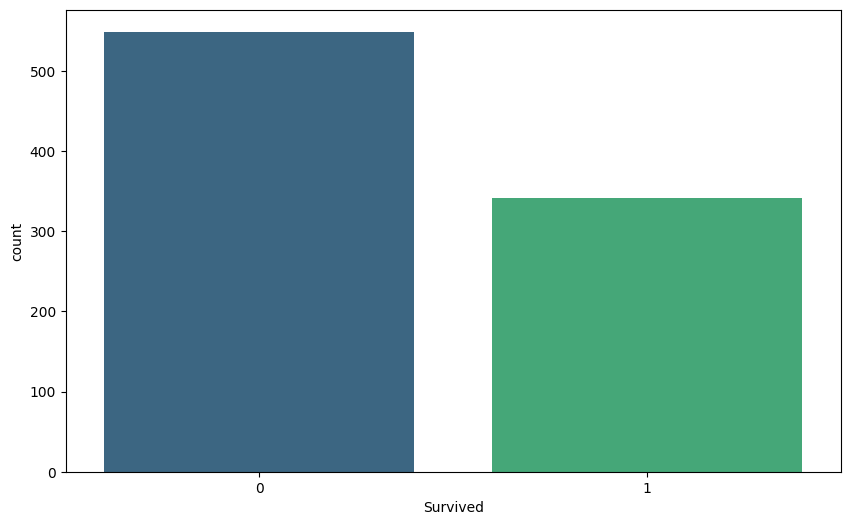

In [15]:
plt.figure(figsize=[10, 6])
sns.countplot(data=df, x=df.Survived, palette='viridis')

In [16]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='Count'>

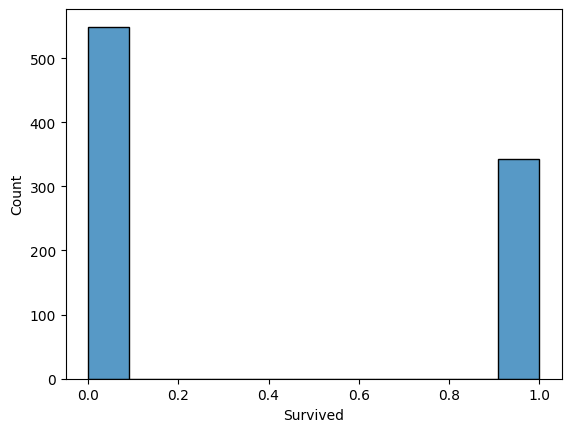

In [17]:
sns.histplot(data=df, x='Survived')

<Axes: >

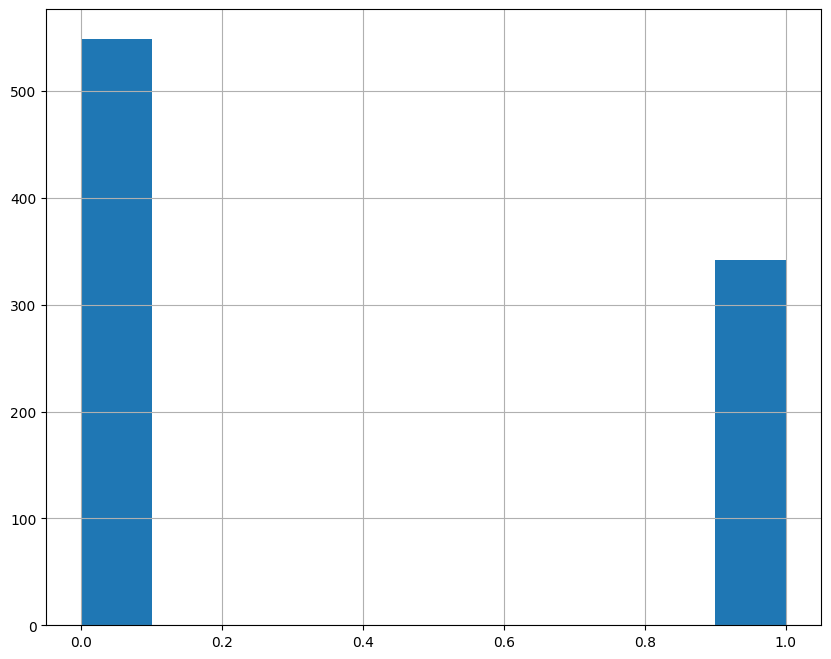

In [18]:
plt.figure(figsize=[10 ,8])
df.Survived.hist()

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [22]:
cat_features = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title']]
cat_features

,Pclass,Sex,SibSp,Parch,Embarked,Title
0,3,male,1,0,S,Mr
1,1,female,1,0,C,Mrs
2,3,female,0,0,S,Miss
3,1,female,1,0,S,Mrs
4,3,male,0,0,S,Mr
...,...,...,...,...,...,...
886,2,male,0,0,S,Other
887,1,female,0,0,S,Miss
888,3,female,1,2,S,Miss
889,1,male,0,0,C,Mr


In [23]:
cat_features.select_dtypes(include=['object']).columns.to_list()

['Sex', 'Embarked', 'Title']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [26]:
cat_features = pd.get_dummies(data=cat_features, dtype=int, drop_first=True)
cat_features

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Title_Mr,Title_Mrs,Title_Other
0,3,1,0,1,0,1,1,0,0
1,1,1,0,0,0,0,0,1,0
2,3,0,0,0,0,1,0,0,0
3,1,1,0,0,0,1,0,1,0
4,3,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
886,2,0,0,1,0,1,0,0,1
887,1,0,0,0,0,1,0,0,0
888,3,1,2,0,0,1,0,0,0
889,1,0,0,1,0,0,1,0,0


In [27]:
df.Age = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

In [28]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [29]:
df = df.drop(columns='Cabin')

In [30]:
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,Mrs


In [31]:
friend_size = df.groupby('Ticket')['Ticket'].transform('count')
df['price_pp'] = df.Fare / friend_size

In [32]:
df[df.PassengerId == 62]['price_pp'].values[0]

np.float64(40.0)

C:\Users\swang\AppData\Local\Temp\ipykernel_23084\1480131625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Embarked', y='price_pp', palette='viridis')


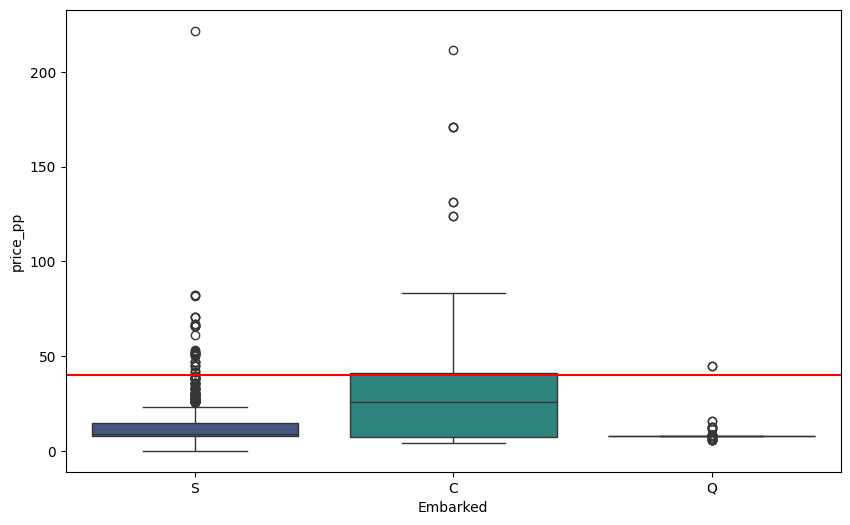

In [33]:
plt.figure(figsize=[10, 6])
sns.boxplot(data=df, x='Embarked', y='price_pp', palette='viridis')
plt.axhline(y=df[df.PassengerId == 62]['price_pp'].values[0], c='r')

In [34]:
df['Embarked'] = df['Embarked'].fillna('C')

In [35]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,price_pp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Other,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,Miss,11.7250
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,30.0000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
 12  price_pp     891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [37]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
price_pp       0
dtype: int64

In [38]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,price_pp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Other,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,Miss,11.7250
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,30.0000


In [39]:
# Label Encoding, полезная штука
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [40]:
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [41]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,price_pp
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,Mr,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,Mrs,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,Mrs,26.5500
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,Mr,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S,Other,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S,Miss,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,W./C. 6607,23.4500,S,Miss,11.7250
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C,Mr,30.0000


In [42]:
df_for_ML = pd.get_dummies(df, columns=['Embarked', 'Title'], dtype=int, drop_first=True)

In [43]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,price_pp
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,Mr,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,Mrs,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,Mrs,26.5500
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,Mr,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S,Other,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S,Miss,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,W./C. 6607,23.4500,S,Miss,11.7250
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C,Mr,30.0000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

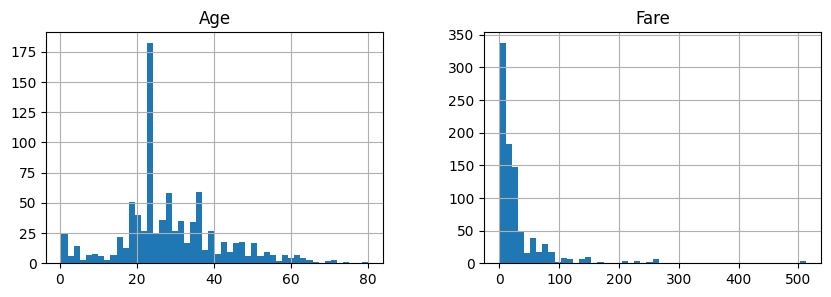

In [44]:
df[['Age', 'Fare']].hist(figsize=[10, 3], bins=50, xlabelsize=10, ylabelsize=10)

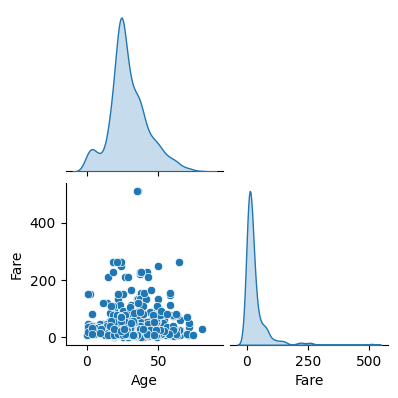

In [45]:
sns.pairplot(df[['Age', 'Fare']], height=2, kind='scatter', diag_kind='kde', corner=True)

<Axes: >

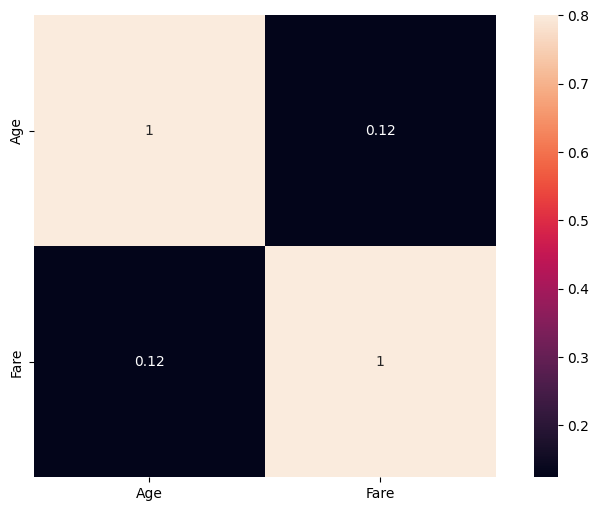

In [46]:
plt.figure(figsize=[10, 6])
sns.heatmap(df[['Age', 'Fare']].corr(), vmax=.8, square=True, annot=True)

In [47]:
df.select_dtypes(exclude=object).corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,price_pp
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.035840,-0.057527,-0.001652,0.012658,-0.002230
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.047255,-0.035322,0.081629,0.257307,0.254824
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.408487,0.083081,0.018443,-0.549500,-0.655559
Sex,0.042939,-0.543351,0.131900,1.000000,0.078421,-0.114631,-0.245489,-0.182333,-0.128809
Age,0.035840,-0.047255,-0.408487,0.078421,1.000000,-0.243526,-0.171095,0.123784,0.251092
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.243526,1.000000,0.414838,0.159651,-0.012298
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.171095,0.414838,1.000000,0.216225,0.060240
Fare,0.012658,0.257307,-0.549500,-0.182333,0.123784,0.159651,0.216225,1.000000,0.839037
price_pp,-0.002230,0.254824,-0.655559,-0.128809,0.251092,-0.012298,0.060240,0.839037,1.000000


<Axes: >

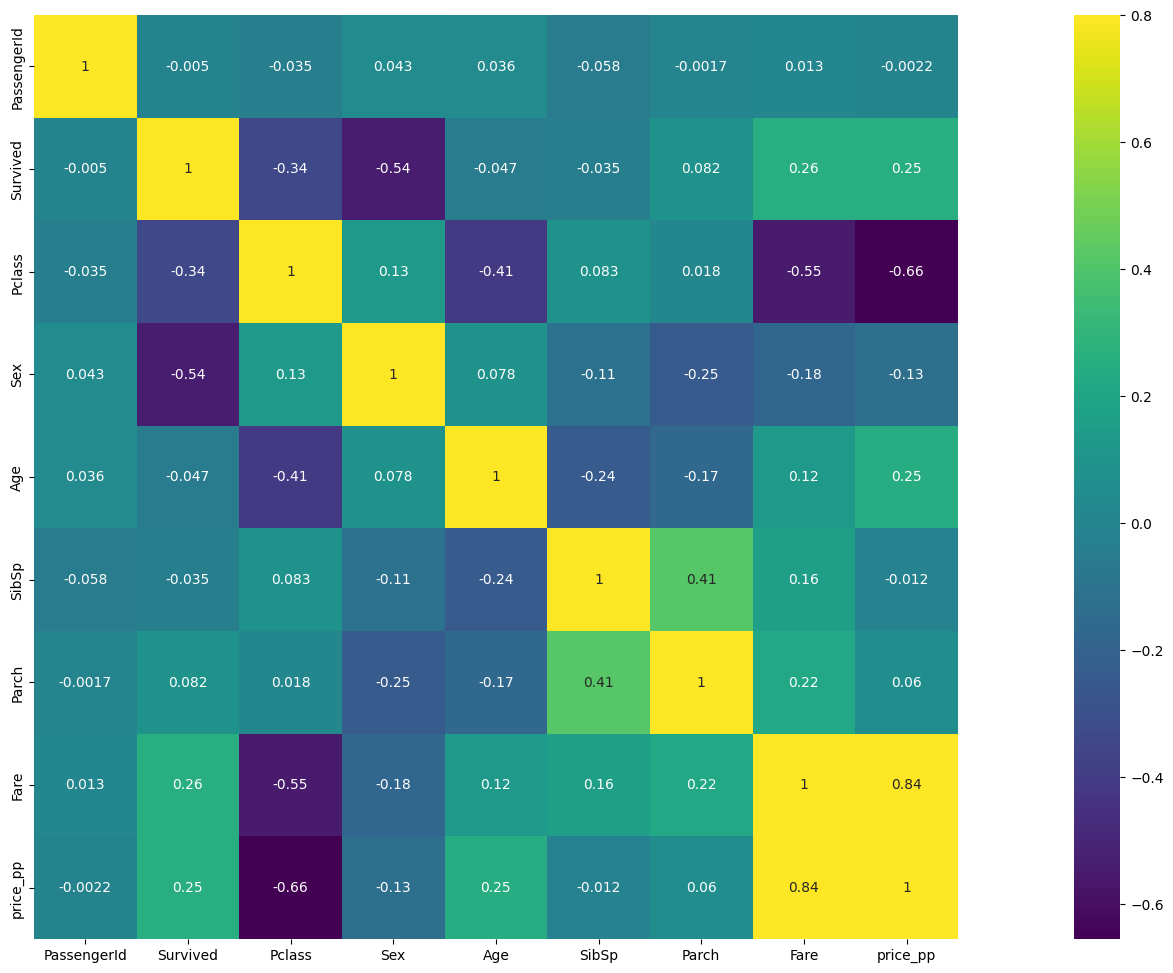

In [48]:
plt.figure(figsize=[30, 12])
sns.heatmap(df.select_dtypes(exclude=object).corr(), square=True, vmax=.8, annot=True, cmap='viridis')

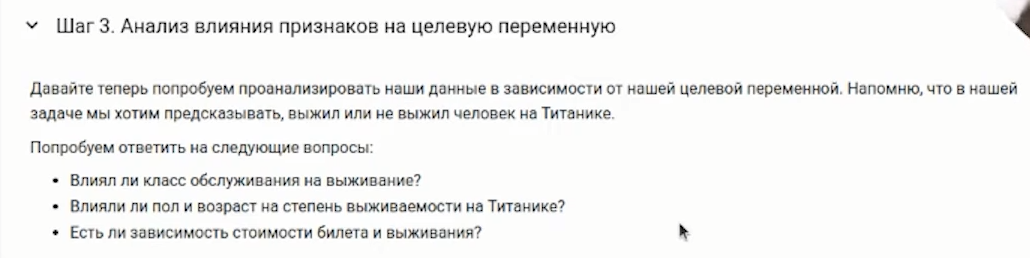

In [49]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

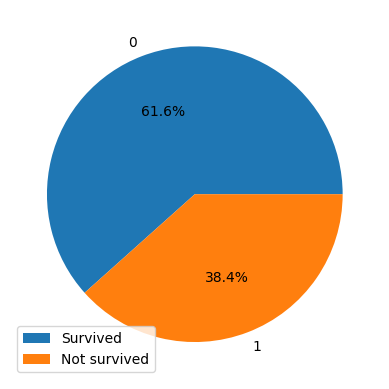

In [50]:
plt.pie(df.Survived.value_counts().values, labels=df.Survived.value_counts().index, autopct='%1.1f%%')
plt.legend(['Survived', 'Not survived'])
plt.show()

<Axes: xlabel='Pclass', ylabel='percent'>

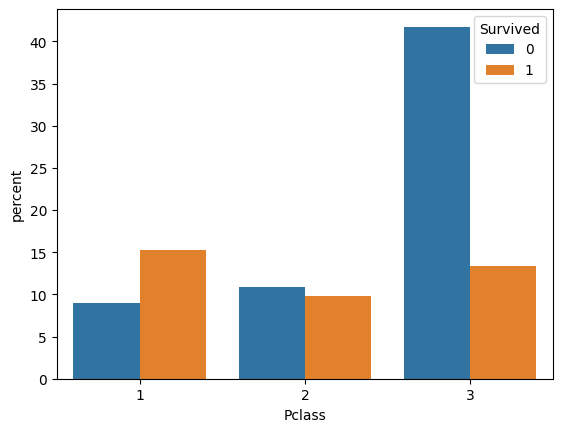

In [51]:
sns.countplot(data=df, x='Pclass', hue='Survived', stat='percent')

In [52]:
pclass_vals = []

for el in range(1, 4):
    print(el)
    pclass_vals.append(df[df.Pclass == el]['Survived'].value_counts().values)

pclass_vals

1
2
3


[array([136,  80]), array([97, 87]), array([372, 119])]

In [53]:
pclass_vals[0]

array([136,  80])

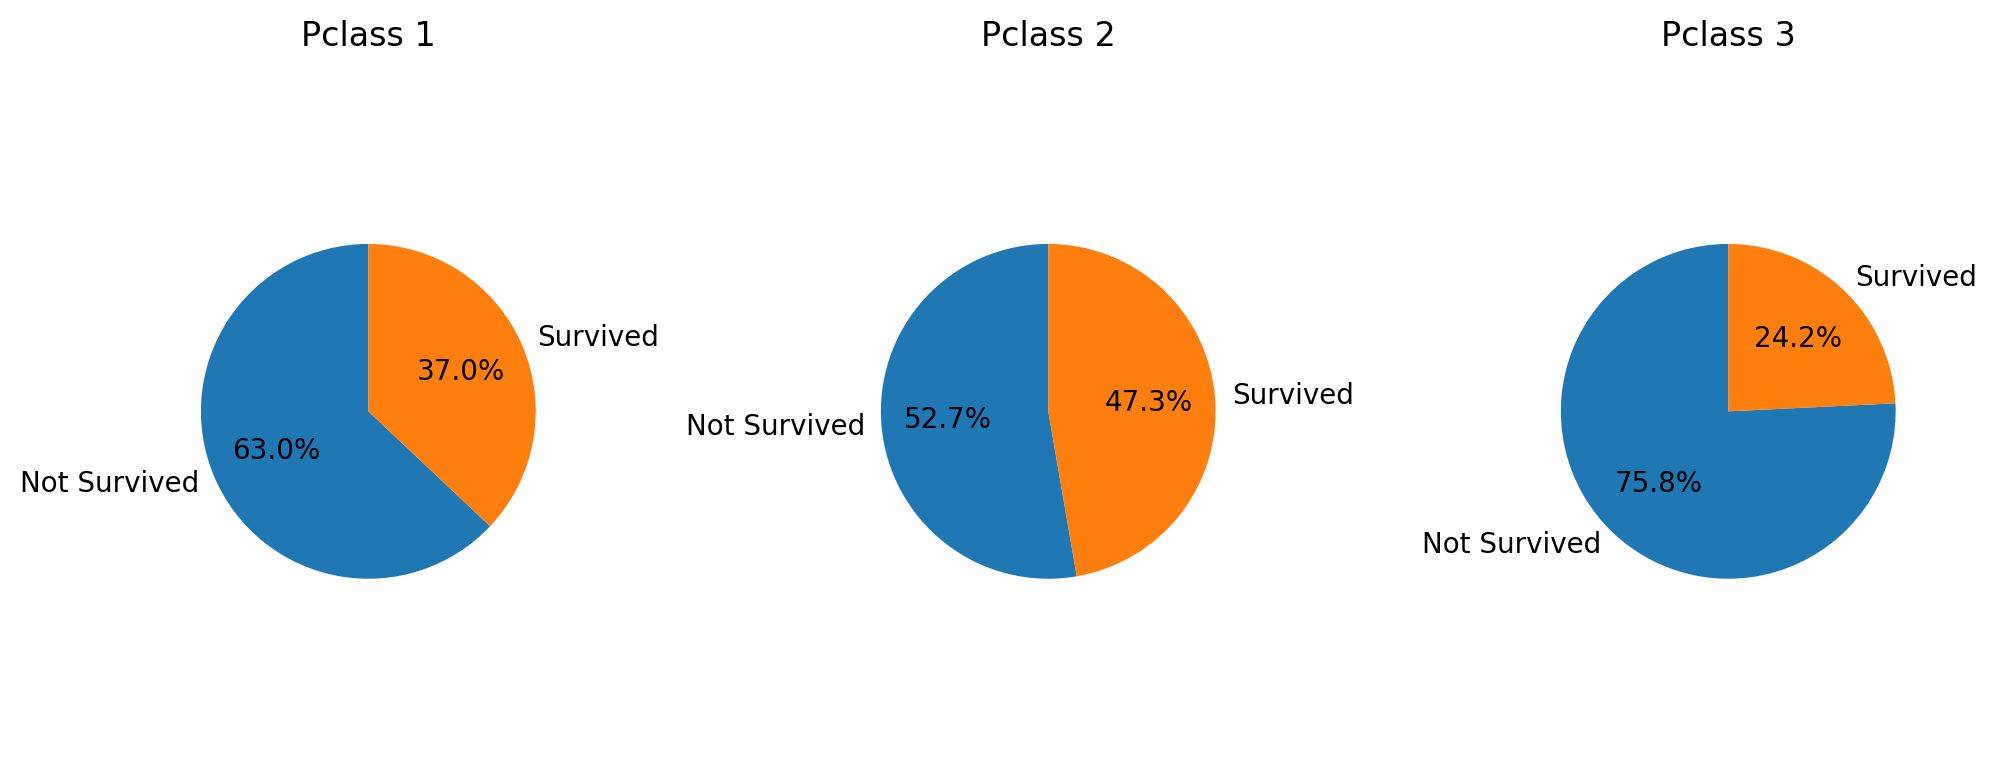

In [54]:
fig, axes = plt.subplots(ncols=3, figsize=[10, 4])

fig.set_dpi(200)

for idx, ax in enumerate(axes):
    ax.set_title(f'Pclass {idx + 1}')
    ax.pie(pclass_vals[idx], labels=['Not Survived', 'Survived'],
            autopct='%1.1f%%',
            startangle=90)
    ax.axis('equal')

plt.tight_layout()



# plt.pie(df.Survived.value_counts().values, labels=df.Survived.value_counts().index, autopct='%1.1f%%')
# plt.legend(['Survived', 'Not survived'])
# plt.show()

In [55]:
df[df.Survived == 1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

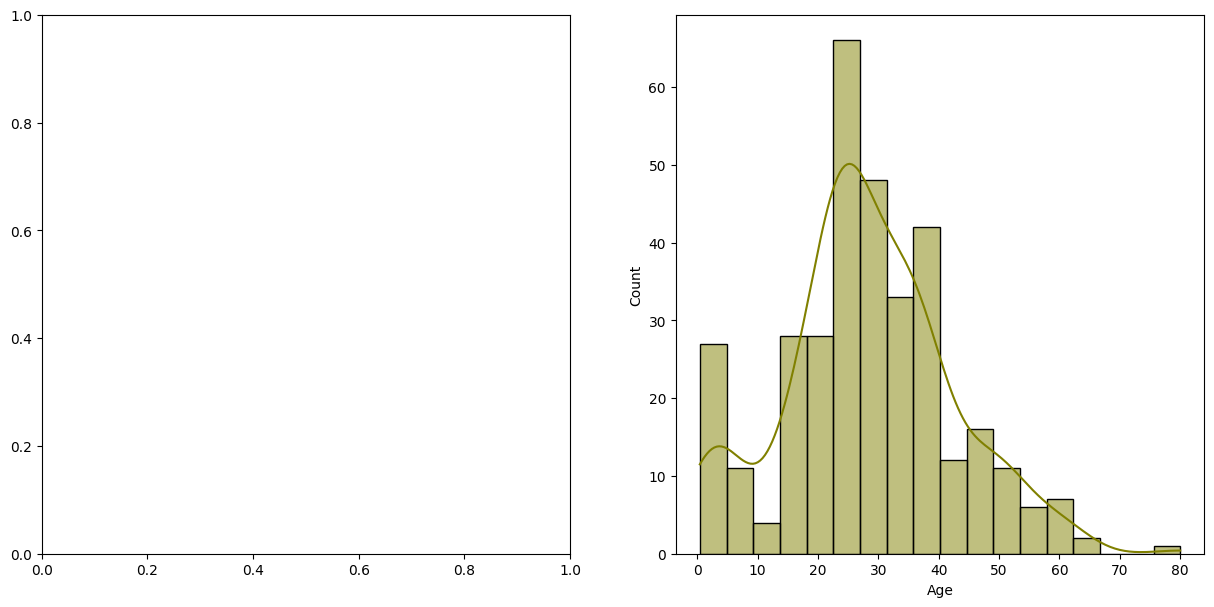

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

#sns.histplot(data=df[df.Survived == 1], x='Sex', kde=True, color='skyblue', ax=axes[0])
sns.histplot(data=df[df.Survived == 1], x='Age', kde=True, color='olive', ax=axes[1])

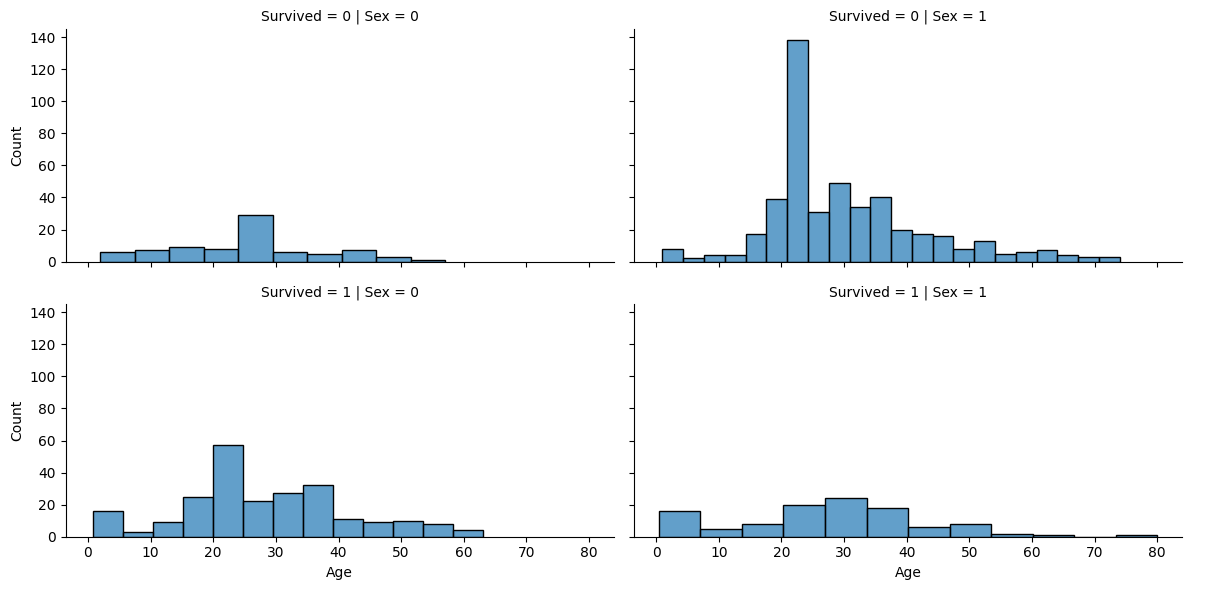

In [57]:
g = sns.FacetGrid(df,  col='Sex', row='Survived', height=3, aspect=2)
g.map(sns.histplot, "Age", alpha=.7)
g.add_legend()

In [58]:
surv_sex = list(zip(df[df['Sex'] == 0]['Survived'].value_counts(), df[df['Sex'] == 1]['Survived'].value_counts()))

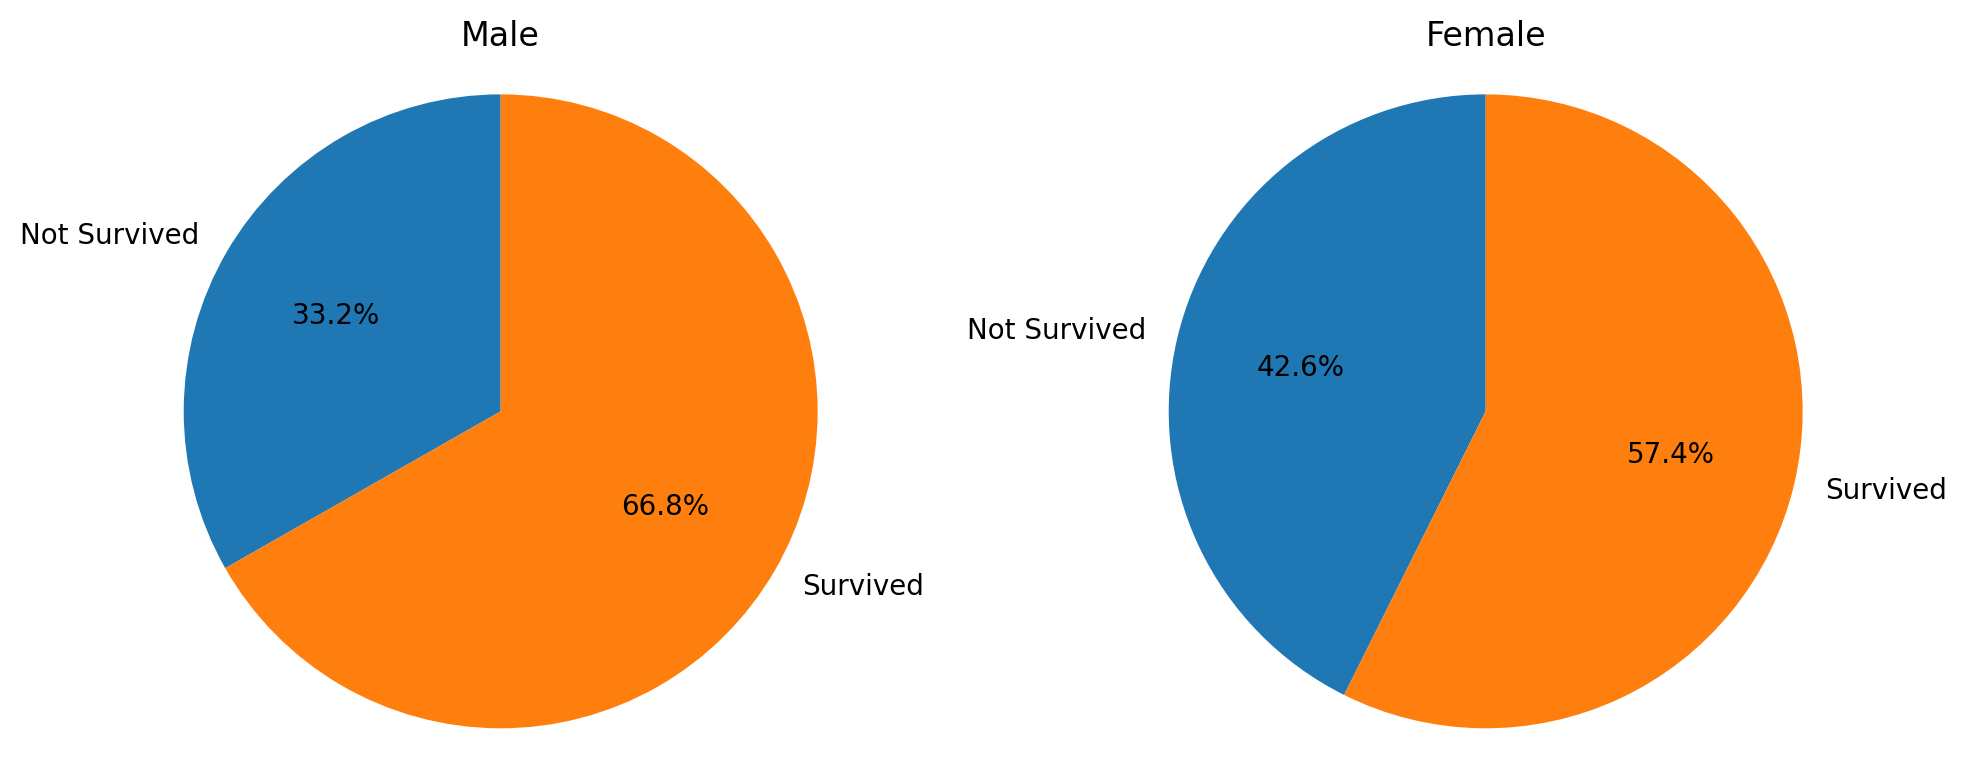

In [59]:
fig, axes = plt.subplots(ncols=2, figsize=[10, 4])


fig.set_dpi(200)

for idx, ax in enumerate(axes):
    ax.set_title('Male' if idx == 0 else 'Female')
    ax.pie(surv_sex[idx], labels=['Not Survived', 'Survived'],
            autopct='%1.1f%%',
            startangle=90)
    ax.axis('equal')

plt.tight_layout()

In [60]:
df[df.Survived == 0]['Fare'], df[df.Survived == 1]['Fare']

(0       7.2500
 4       8.0500
 5       8.4583
 6      51.8625
 7      21.0750
         ...   
 884     7.0500
 885    29.1250
 886    13.0000
 888    23.4500
 890     7.7500
 Name: Fare, Length: 549, dtype: float64,
 1      71.2833
 2       7.9250
 3      53.1000
 8      11.1333
 9      30.0708
         ...   
 875     7.2250
 879    83.1583
 880    26.0000
 887    30.0000
 889    30.0000
 Name: Fare, Length: 342, dtype: float64)

<Axes: ylabel='Fare'>

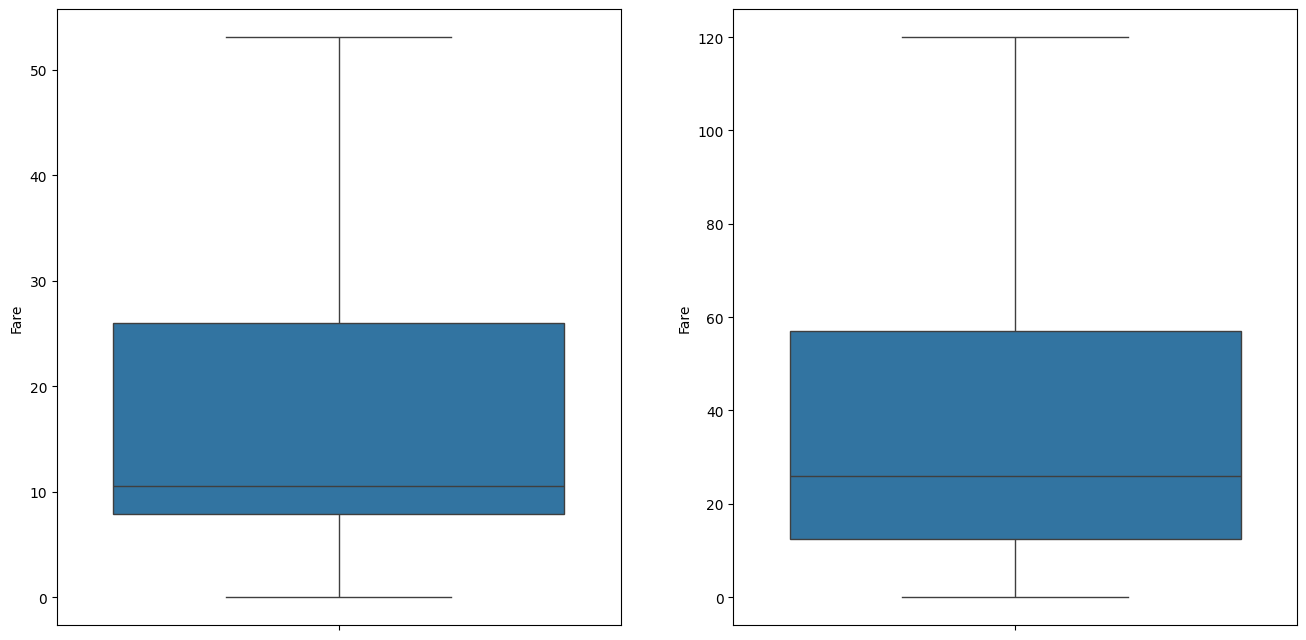

In [61]:
fig, axes = plt.subplots(1, 2, figsize=[16, 8])

sns.boxplot(data=df[df.Survived == 0], y='Fare', ax=axes[0], showfliers=False)
sns.boxplot(data=df[df.Survived == 1], y='Fare', ax=axes[1], showfliers=False)

In [62]:
first_quartile = np.quantile(df.Fare, q=.25)
second_quartile = np.quantile(df.Fare, q=.75)
print(f'First q: {first_quartile}, second q: {second_quartile}')

First q: 7.9104, second q: 31.0


In [63]:
df_for_ML

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,price_pp,Embarked_Q,Embarked_S,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7.2500,0,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,71.2833,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7.9250,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,26.5500,0,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8.0500,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,13.0000,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,30.0000,0,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,W./C. 6607,23.4500,11.7250,0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,30.0000,0,0,1,0,0


In [64]:
df_for_ML.to_csv('csv_files/prepared_data.csv')

In [65]:
df_for_ML.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'price_pp', 'Embarked_Q', 'Embarked_S',
       'Title_Mr', 'Title_Mrs', 'Title_Other'],
      dtype='object')

In [110]:
X = df_for_ML.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', ])

In [111]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   price_pp     891 non-null    float64
 7   Embarked_Q   891 non-null    int64  
 8   Embarked_S   891 non-null    int64  
 9   Title_Mr     891 non-null    int64  
 10  Title_Mrs    891 non-null    int64  
 11  Title_Other  891 non-null    int64  
 12  has_cabin    891 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 90.6 KB


In [112]:
y = df.Survived

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=228, shuffle=True)

# Creating ML models

## Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [115]:
scaler = StandardScaler()

In [116]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [117]:
log_model = LogisticRegression(penalty='l2', solver='lbfgs')
param_grid = {
    'C': [.0001, .001, .01, .1, 1, 10, 20, 30]
}

grid_model = GridSearchCV(log_model, param_grid)

In [118]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30]})

In [119]:
y_pred = grid_model.predict(scaled_X_test)

In [120]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [121]:
accuracy_score(y_test, y_pred)

0.776536312849162

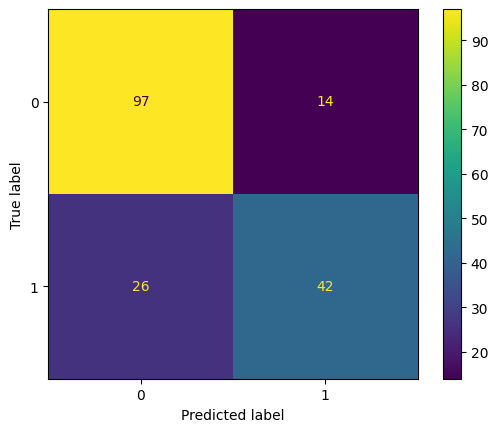

In [122]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       111
           1       0.75      0.62      0.68        68

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.77      0.78      0.77       179



In [ ]:
# dump(grid_model, 'models/log_regr.joblib')

['models/log_regr.joblib']

In [124]:
log_model_sagal1 = LogisticRegression(penalty='l1', solver='saga')

grid_model_sagal1 = GridSearchCV(log_model, param_grid)

In [ ]:
# grid_model_sagal1.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30]})

In [126]:
y_pred2 = grid_model_sagal1.predict(scaled_X_test)

In [127]:
accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred)

(0.776536312849162, 0.776536312849162)

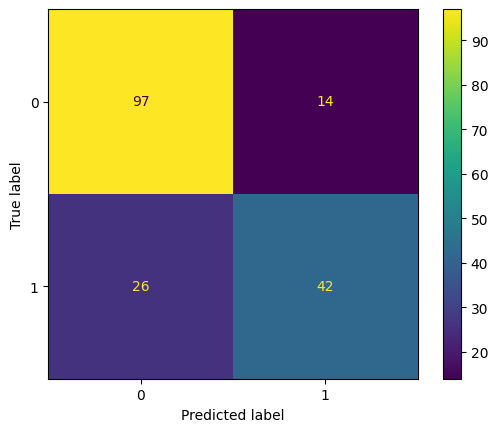

In [128]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

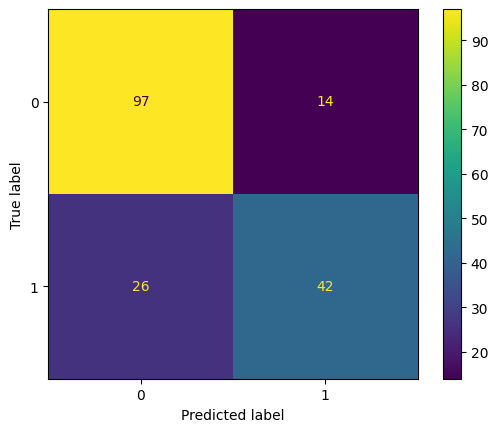

In [129]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred2)).plot()

In [130]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       111
           1       0.75      0.62      0.68        68

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.77      0.78      0.77       179



In [131]:
# Для модели с L1
print(grid_model_sagal1.best_estimator_.coef_)

[[-0.26698441 -0.4327393  -0.20173364 -0.17904355 -0.06074952  0.10459833
   0.12642671  0.01890105 -0.0756706  -0.44614404  0.20668279  0.09196495
   0.21606654]]


## Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
np.sqrt(X.columns.shape[0]).round() # == 3

np.float64(4.0)

In [134]:
rfc_model = RandomForestClassifier(max_features=3)

In [135]:
param_grid = {
    'n_estimators': np.arange(64, 128, 4),
    'max_depth': np.arange(5, 30, 3),
    'min_samples_split': np.arange(2, 5)
}

In [136]:
rfc_grid = GridSearchCV(rfc_model, param_grid)

In [ ]:
#rfc_grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(max_features=3),
             param_grid={'max_depth': array([ 5,  8, 11, 14, 17, 20, 23, 26, 29]),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': array([ 64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108, 112,
       116, 120, 124])})

In [138]:
y_pred_rf = rfc_grid.predict(scaled_X_test)

In [139]:
accuracy_score(y_test, y_pred_rf)

0.7541899441340782

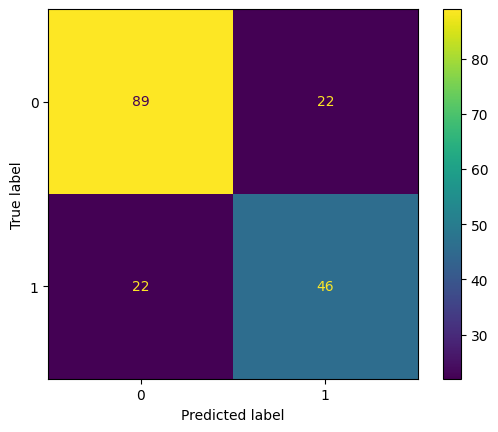

In [140]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf)).plot()

In [141]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       111
           1       0.68      0.68      0.68        68

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



In [143]:
from joblib import dump, load

In [ ]:
#dump(rfc_grid, 'models/random_forest_model.joblib')

['models/random_forest_model.joblib']

## AdaBoost

In [142]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
afa_clf = AdaBoostClassifier()